In [15]:
import pandas as pd
import numpy as np
import volatility_arb as va

import seaborn as sns
import matplotlib.pyplot as plt

## Model Setup

In [17]:
# OMXS30 daily returns from 2015-10-01 to 2025-10-01
data = pd.read_csv('_omxs30_data.csv', header=0, index_col=0, parse_dates=True)

rets = data["return"]
rets = rets.dropna()
rets = rets[rets != 0]
start = rets.index[0]
end = rets.index[-1]

model='GARCH'
mean='constant'
dist='studentst'
method='analytic'
horizon = 21
lookback = 756

## Realized Variance Estimation

In [20]:
real_var_est = va.variance_forecast(
    rets=rets, start_date=start, end_date=end, vol=model, mean=mean, dist=dist, 
    horizon=horizon, lookback=lookback, method=method,
    p=1, q=1)
period_start = real_var_est.index[0]
integrated_real_var = (rets[period_start:].rolling(21).std()**2)*252
real_var_rel_err = ((real_var_est) / integrated_real_var) - 1
real_var_abs_err = ((real_var_est) - integrated_real_var)

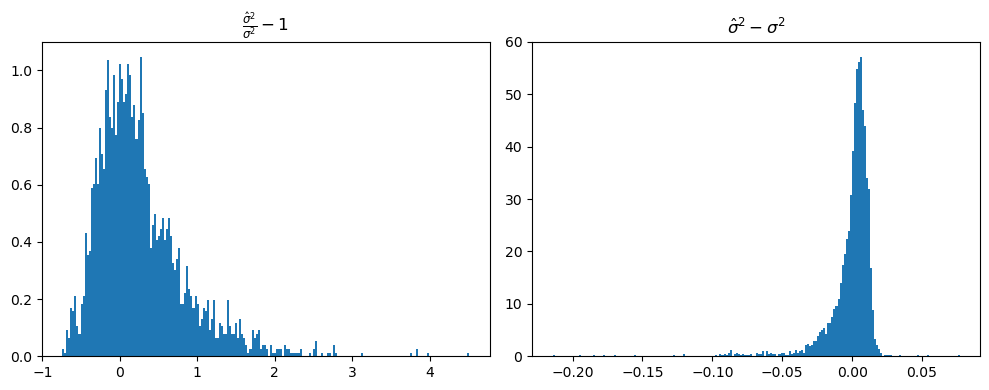

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].hist(real_var_rel_err, density=True, bins=200)
ax[0].set_title(r"$\frac{\hat{\sigma}^2}{\sigma^2} - 1$")

ax[1].hist(real_var_abs_err, density=True, bins=200)
ax[1].set_title(r"$\hat{\sigma}^2 - \sigma^2$")

fig.tight_layout()
plt.show()

In [22]:
real_vol = np.sqrt(real_var_est)
imp_vol = data["1m_iv"]
ratio = imp_vol / real_vol

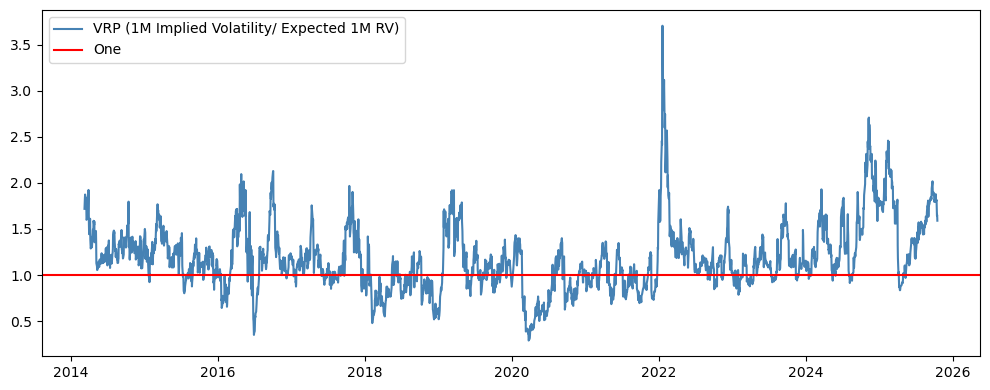

In [45]:
fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(ratio, label='VRP (1M Implied Volatility/ Expected 1M RV)', color='steelblue')
ax.axhline(1, color='r', label='One')
ax.set_xlabel('')
ax.legend(loc=2)
fig.tight_layout()
plt.show()